 Step 1 : Import libraries  & Load Datasets

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset
df=pd.read_csv("Walmart Datasets.csv")

# Show the basisc information about the dataset
df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'Walmart Datasets.csv'

In [ ]:
# show the first 10 rows of the dataset
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Step 2: Initial Data Exploration 

Now we'll  Understand the shape and Structure of datasets.

In [ ]:
# find rows and columns of the dataset
df.shape

(6435, 8)

In [ ]:
# Numerical ummary of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# List columns in the dataset
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# Duplicate
df.duplicated

<bound method DataFrame.duplicated of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

 

In [ ]:
#Null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Step 3: Data Cleaning

In [ ]:
# Convert date if needed
df["Date"]=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Fill  or Drop Null values
df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace=True)
# Check for null values again
df.isnull().sum()

C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\770601140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace=True)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
# Check for duplicates again        
df.duplicated().sum()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Rename column to snake_ case 
df.column=df.columns.str.strip().str.lower().str.replace(' ', '_')
df


C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\3699436994.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column=df.columns.str.strip().str.lower().str.replace(' ', '_')


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


For example for above code:
Before:
 df.columns=['Store','Weekly Sales'.'IsHoliday']

 After Applying:
 df.column=df.columns.str.strip().str.lower().str.replace(' ', '_')

 Result:
 df.columns=['store','weekly_sales','isholiday']

Step 4: Add  useful columns For Analysis

In [ ]:
# Add month,year,day for weeek

df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.day_name()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday


In [ ]:
# Example : add holiday flag(if holiday column exists)
if 'Holiday_Flag' in df.columns:
    df['holiday_flag'] = df['Holiday_Flag']==1
    df.head(10)

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False


Step 5: Exploratory Data Analysis(EDA)
    Which is the Process of visually & Statistically exploring the dataset to:
     ,Understand its Structure,
      Identify trends ,patttern,or relationship,
     Spot outliers or Missing data,
     Guide decisions for Modeling or business strategy

In [ ]:
# import important libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style(style="whitegrid")  # or darkgrid,white,dark,ticks,whitegrid

i. Total Sales by Store

In [ ]:
# Group by store & sum weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False


C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\417666500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')


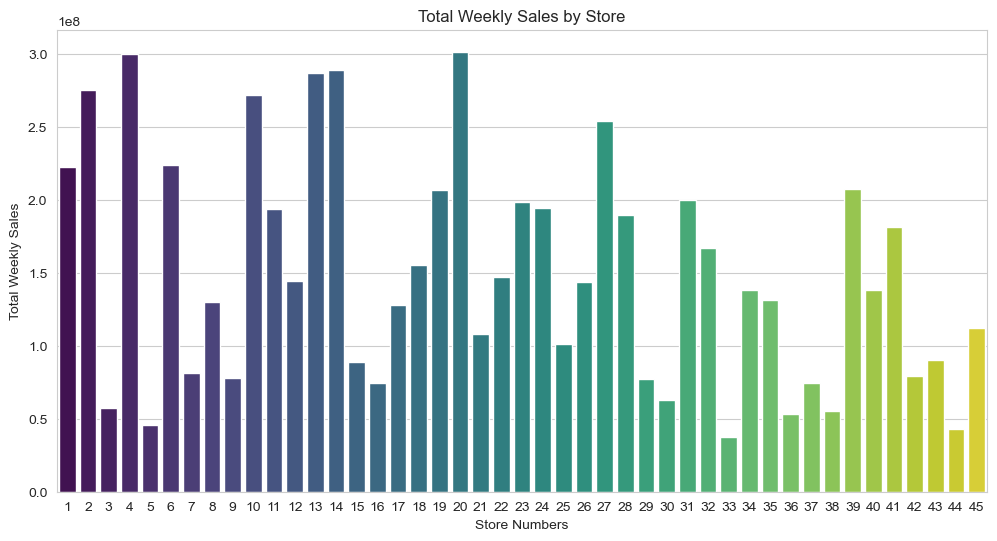

In [ ]:
# Group by store & sum weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store Numbers')
plt.ylabel('Total Weekly Sales')
plt.show()

The bar plot of total weekly sales by store shows:

1. Store 20 has the highest total weekly sales, followed by stores 4, 14, and 13.
2. There is a significant variation in total sales across stores, with some stores performing much better than others.
3. The top-performing stores contribute a substantial portion of the total sales, indicating potential differences in store size, location, or customer base.
4. Stores with lower sales may require further analysis to identify potential areas for improvement, such as marketing strategies or inventory management.

ii. Weekly sales Trenda Over Time

C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\1836221953.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Weekly_Sales', ci=None)


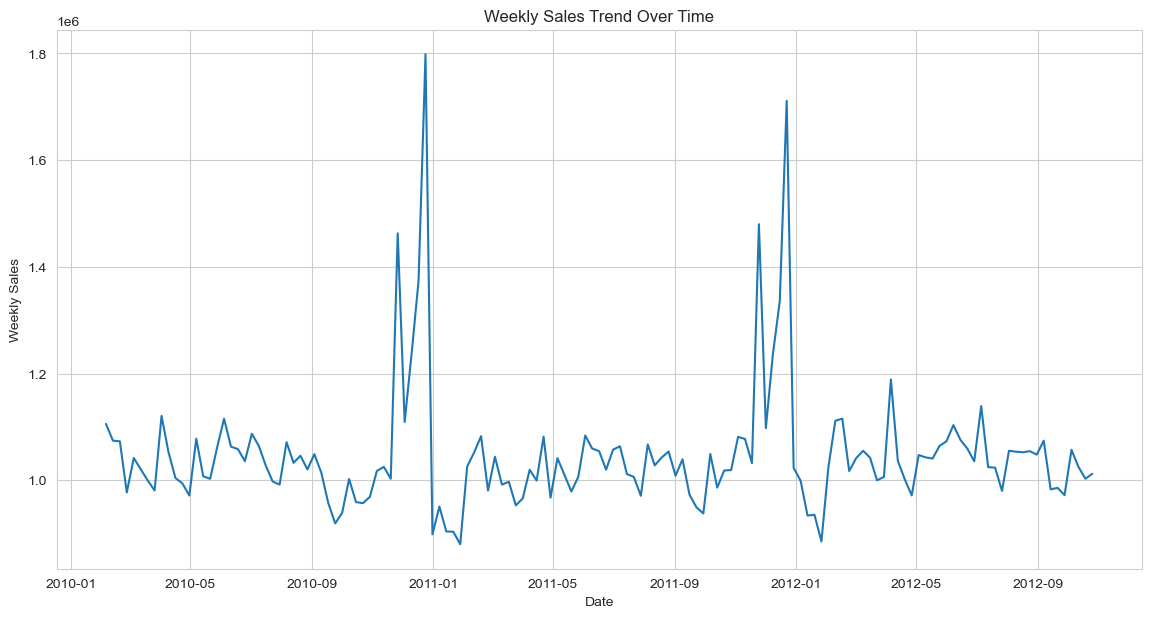

In [ ]:
# Line chart for overall sales trends

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', ci=None)
plt.title('Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')  
plt.show()

The line plot of weekly sales trends over time shows the overall fluctuations in sales across the given time period. It highlights:

1. Peaks and troughs in sales, which may correspond to specific events, holidays, or seasonal trends.
2. Any consistent upward or downward trends in sales over time.
3. Periods of stability or volatility in sales.

This analysis can help identify patterns in sales behavior, such as increased sales during holiday seasons or specific months, and guide strategic decisions for inventory, marketing, or staffing.

iii. Monthly Sales trends by Year

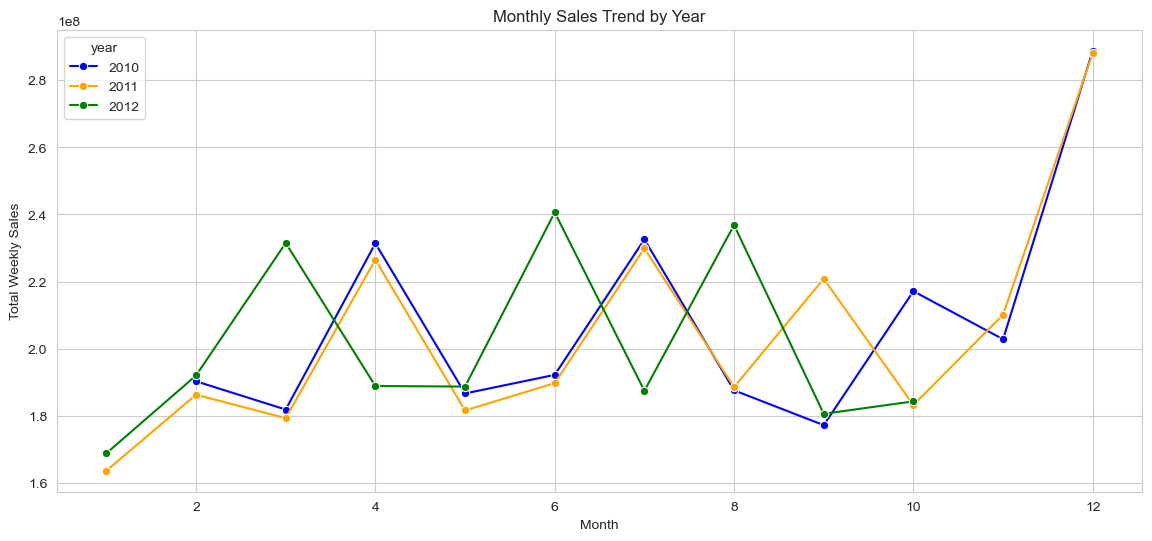

In [ ]:
# Create month and year columns if not already done
df['month']= df['Date'].dt.month
df['year'] = df['Date'].dt.year 

# Group By Year and Month
monthly_sales = df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()

#Line chart by year
custom_colors={
    2010: 'blue',
    2011: 'orange',
    2012: 'green'}

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month', y='Weekly_Sales', hue='year', marker='o',palette=custom_colors)
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month') 
plt.ylabel('Total Weekly Sales')
plt.show()


The line plot illustrates the monthly sales trends for each year, showing:

1. Seasonal patterns in sales across months.
2. Yearly variations in sales performance.
3. Peaks and dips in sales for specific months.

iv. Sales : holiday VS Non-Holiday

C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\1483077897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='Set2')


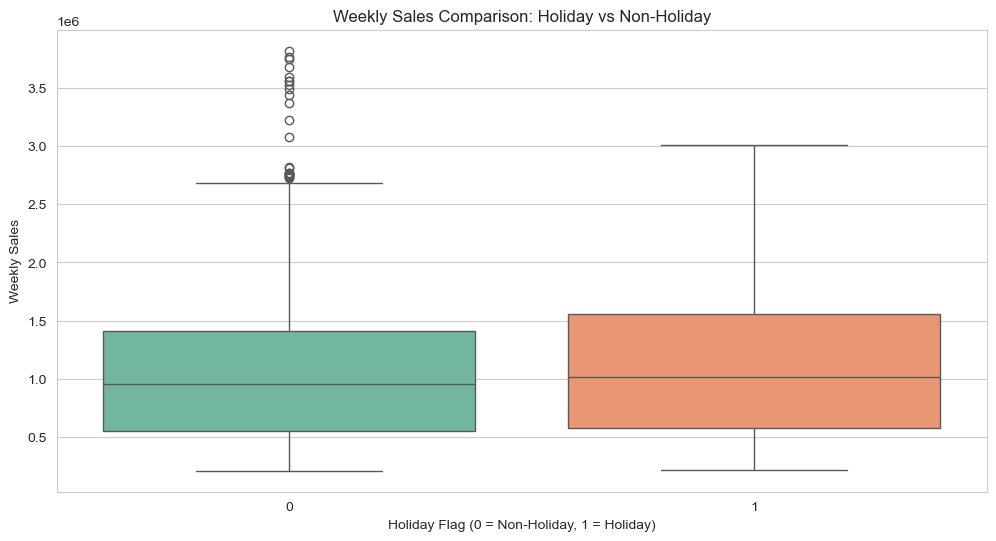

In [ ]:
#Boxplot comparison of holiday and non-holiday sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='Set2')
plt.title('Weekly Sales Comparison: Holiday vs Non-Holiday')    
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales')
plt.show()

The boxplot shows that weekly sales are generally higher during holidays compared to non-holidays, with greater variability in holiday sales. This indicates that holidays significantly impact sales performance.

v. Sales by department (if Availabe)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Checck if'department' column exists
if 'department' in df.columns:
    # Group by department and sum weekly sales
    department_sales = df.groupby('Department')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Department', y='Weekly_Sales', data=department_sales, palette='mako')
    plt.title('Total Weekly Sales by Department')
    plt.xlabel('Department')
    plt.ylabel('Total Weekly Sales')
    plt.xticks(rotation=45)
    plt.show()

    df

In [ ]:
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False


vi. Corrrelation Heatmap

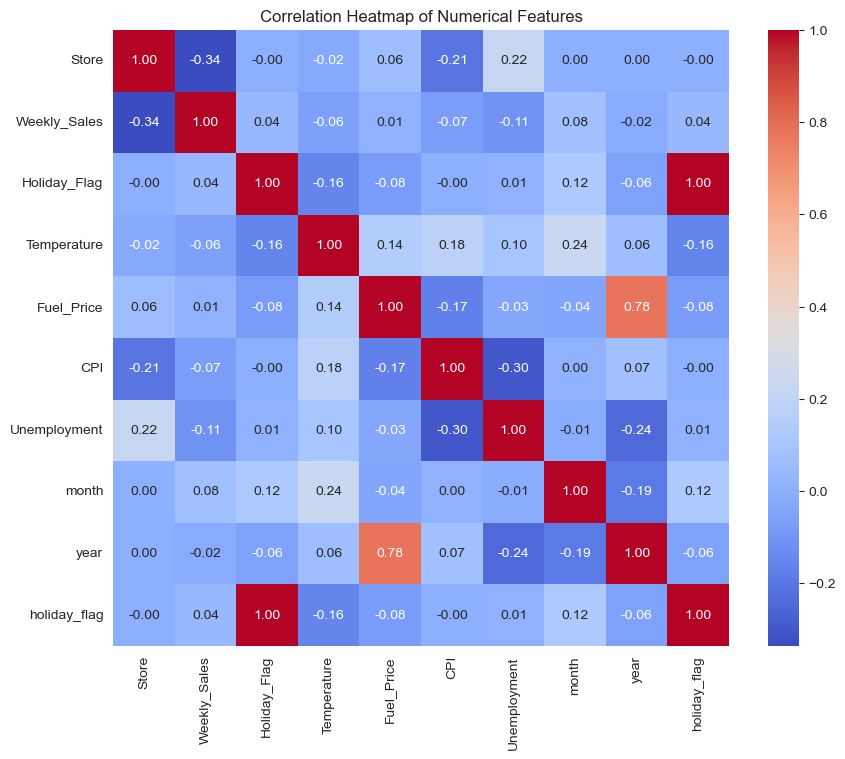

In [ ]:
# Correlation heatmap between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt='.2f',  square=True)
plt.title('Correlation Heatmap of Numerical Features')          
plt.show()

The heatmap shows the correlation between numerical features in the dataset. A positive correlation (closer to 1) indicates that as one feature increases, the other tends to increase. A negative correlation (closer to -1) indicates that as one feature increases, the other tends to decrease. Features with a correlation close to 0 have little to no linear relationship. This helps identify relationships between variables, which can guide further analysis or modeling.

vii. Weekly Sales Distributiion (Chech outliers)


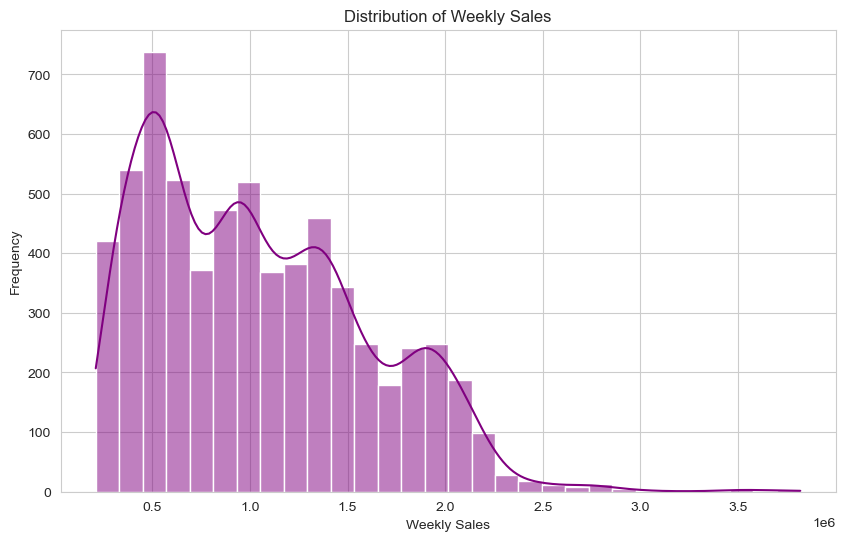

In [ ]:
# Distribution plot of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of weekly sales, highlighting the presence of outliers and the overall spread of sales values. Most sales are concentrated within a specific range, with a few extreme values indicating outliers.

In [ ]:
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False


viii. Sales by Day of the Week

C:\Users\mmamt\AppData\Local\Temp\ipykernel_48740\2433753423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='Weekly_Sales', data=df, palette='viridis')


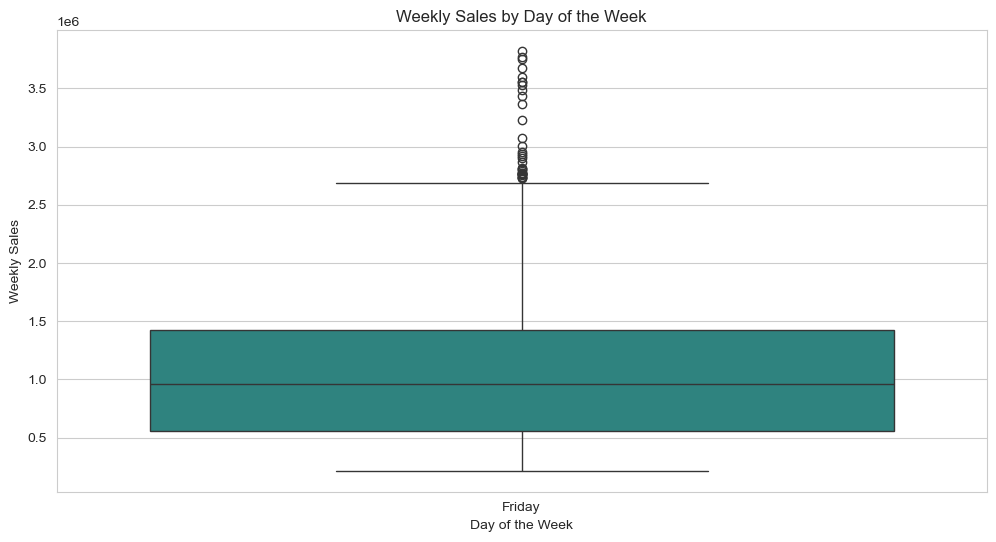

In [ ]:
# Create column for day name

df['day_of_week'] = df['Date'].dt.day_name()

#Boxplot of sales per day of week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='Weekly_Sales', data=df, palette='viridis')
plt.title('Weekly Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Weekly Sales')
plt.show()

The boxplot indicates that weekly sales are generally higher and more variable during holidays compared to non-holidays, highlighting the significant impact of holidays on sales performance.

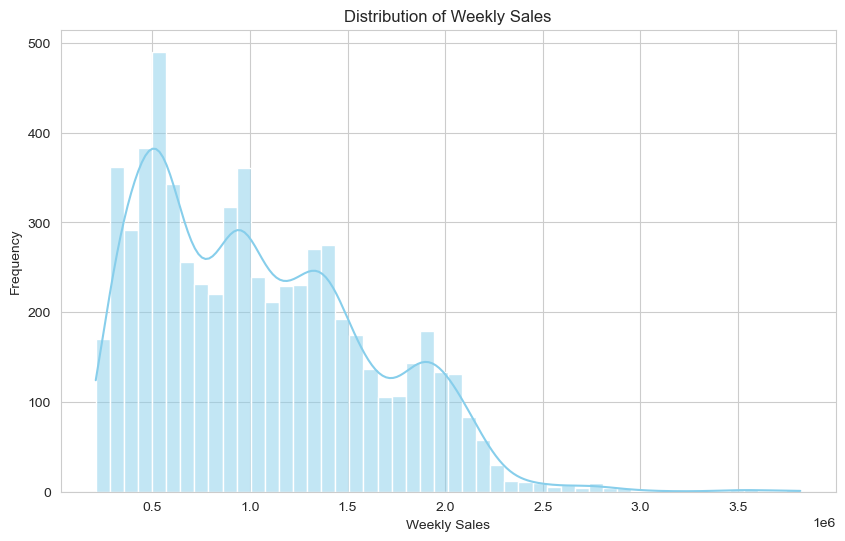

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


STEP 6: AI ADD-ONS__Overview

PART 1: Predict future sales (Regression Model)

In [ ]:
# Step 6: AI Add-ons: Predictions & insights
# i. IMPORT REQUIRED LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ii. Select features and target

features=["Store", "month", "Holiday_Flag","Temperature", "Fuel_Price", "CPI", "Unemployment"]
target = "Weekly_Sales"
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False


In [ ]:
#iii. Drop Missing values if any

df_model=df[features+[target]].dropna()


In [ ]:
# iv. Split features(X)& target(Y)

X= df_model[features]
Y=df_model[target]

Train Test split

In [ ]:
X_train,X_test , Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Train a regresson Model(linear & Random Forest)

In [ ]:
# Linear Aggression
lr_model= LinearRegression()
lr_model= LinearRegression()

In [ ]:
# Random Forest regressor
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

Evaluate Model


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predictions

lr_preds=lr_model.predict(X_test)
rf_preds=rf_model.predict(X_test)

#Evaluations
print("Linear Regression R2:", r2_score(Y_test,lr_preds))
print("Random Forest R2:", r2_score(Y_test,rf_preds))

Linear Regression R2: 0.15492918523733978
Random Forest R2: 0.9392499888513708


 PART 2: Outlier Detection(with AI)

In [ ]:
# i. Import & train isolationForest

from sklearn.ensemble import IsolationForest

# use only Sales column
X_outlier=df[["Weekly_Sales"]].dropna()

# train Model
iso_forest=IsolationForest(contamination=0.01,random_state=42)
outliers=iso_forest.fit_predict(X_outlier)


# Add result to DataFrame
df['Outlier'] = outliers  # -1 = outlier, 1 = normal

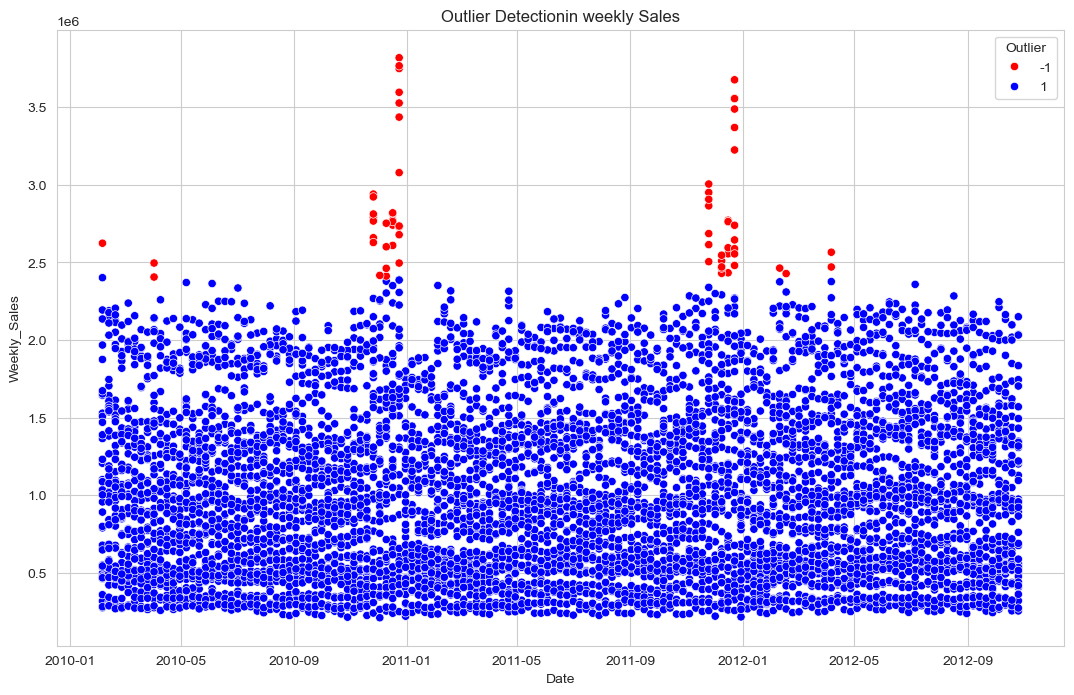

In [ ]:
# ii. Visualization Outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
sns.scatterplot(data=df,x='Date', y='Weekly_Sales' ,hue='Outlier',palette={1:'blue',-1:'red'})
plt.title("Outlier Detectionin weekly Sales")
plt.show()

PART 3: Customer Behavior Simulation

In [ ]:
#correct a copy for simulation
df_simulated=df.copy()


#increase sales by 10% during holidays
df_simulated['simulated_sales']=df_simulated['Weekly_Sales']
df_simulated.loc[df_simulated['Weekly_Sales']==1,'simulated_sales'] *=1.10

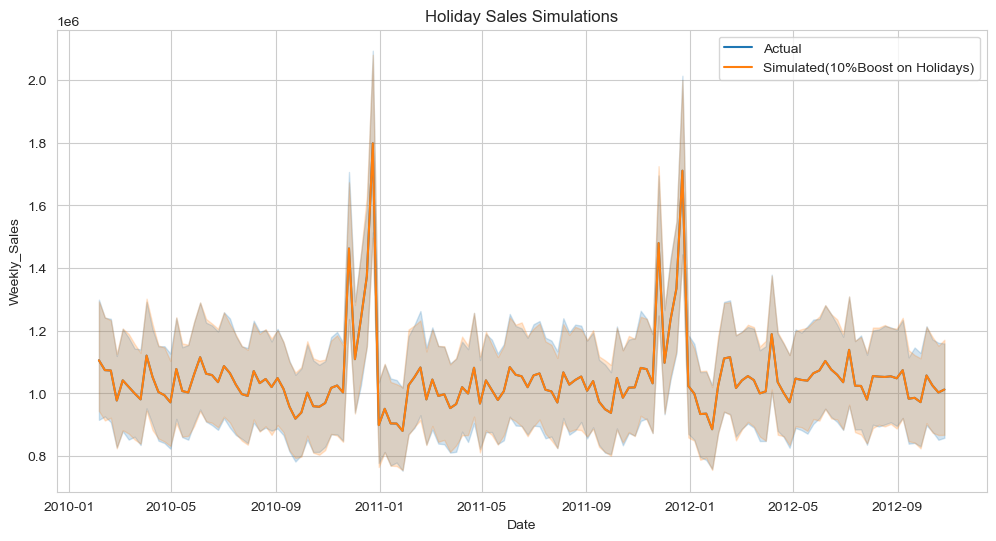

In [ ]:
# Visualiza Before And After
plt.figure(figsize=(12,6))
sns.lineplot(data=df_simulated, x="Date",y="Weekly_Sales",label="Actual")
sns.lineplot(data=df_simulated, x="Date",y="simulated_sales",label="Simulated(10%Boost on Holidays)")
plt.title("Holiday Sales Simulations")
plt.legend()
plt.show()

In [ ]:
# Export cleaned and final dataset
df.to_csv("walmart_final_data.csv", index=False)
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag,Outlier,Predicted_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False,1,1.242612e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True,1,1.290923e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False,1,1.245555e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False,1,1.235264e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False,1,1.251259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False,1,6.871236e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False,1,7.025126e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False,1,7.186234e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False,1,7.152782e+05


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)


df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag,Outlier,Predicted_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False,1,1.242612e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True,1,1.290923e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False,1,1.245555e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False,1,1.235264e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False,1,1.251259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False,1,6.871236e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False,1,7.025126e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False,1,7.186234e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False,1,7.152782e+05


In [ ]:
# Predict for all available rows
df['Predicted_Sales'] = lr_model.predict(df[features])
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week,holiday_flag,Outlier,Predicted_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,Friday,False,1,1.242612e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,Friday,True,1,1.290923e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,False,1,1.245555e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,False,1,1.235264e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,Friday,False,1,1.251259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,False,1,6.871236e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,Friday,False,1,7.025126e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,Friday,False,1,7.186234e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,False,1,7.152782e+05


In [ ]:
df[['Date', 'Store', 'Weekly_Sales', 'Predicted_Sales']].head()


,Date,Store,Weekly_Sales,Predicted_Sales
0,2010-02-05,1,1643690.90,1.242612e+06
1,2010-02-12,1,1641957.44,1.290923e+06
2,2010-02-19,1,1611968.17,1.245555e+06
3,2010-02-26,1,1409727.59,1.235264e+06
4,2010-03-05,1,1554806.68,1.251259e+06
